In [1]:
import rasterio
import rasterio.mask
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely import geometry
from matplotlib import pyplot
from rasterio.plot import show
import contextily as cx

## Data

In [ ]:
path = '../raw_data/berlin_urban_class.json'

In [ ]:
urban_class_bln = gpd.read_file(path)

In [2]:
path2 = '../raw_data/Berlin_Landuse.gpkg'

In [11]:
land_use_bln_raw = gpd.read_file(path2)

In [12]:
land_use_bln_raw

,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
0,DE,Berlin,DE001L1,11100,Continuous urban fabric (S.L. : > 80%),2020-10,281-DE001L1,169.628613,1549.101213,NaN,4,"MULTIPOLYGON (((4594946.630 3211089.861, 45948..."
1,DE,Berlin,DE001L1,11240,Discontinuous very low density urban fabric (S...,2020-10,50285-DE001L1,418.916845,10405.048666,NaN,153,"MULTIPOLYGON (((4567351.284 3247553.321, 45672..."
2,DE,Berlin,DE001L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-10,12889-DE001L1,379.392590,7083.683610,NaN,65,"MULTIPOLYGON (((4551825.997 3252118.948, 45518..."
3,DE,Berlin,DE001L1,12100,"Industrial, commercial, public, military and p...",2020-10,61446-DE001L1,433.426566,10985.316622,NaN,1,"MULTIPOLYGON (((4561345.202 3263503.216, 45612..."
4,DE,Berlin,DE001L1,11100,Continuous urban fabric (S.L. : > 80%),2020-10,2773-DE001L1,1762.596181,37719.329088,NaN,308,"MULTIPOLYGON (((4525644.165 3267406.378, 45257..."
...,...,...,...,...,...,...,...,...,...,...,...,...
120823,DE,Berlin,DE001L1,50000,Water,2020-10,120635-DE001L1,1377.813478,33656.802817,NaN,0,"MULTIPOLYGON (((4554000.000 3266302.790, 45539..."
120824,DE,Berlin,DE001L1,50000,Water,2020-10,120726-DE001L1,1416.393924,74470.833292,NaN,0,"MULTIPOLYGON (((4563000.000 3269318.088, 45630..."
120825,DE,Berlin,DE001L1,50000,Water,2020-10,120734-DE001L1,533.073685,8431.840582,NaN,0,"MULTIPOLYGON (((4555000.000 3269445.344, 45550..."
120826,DE,Berlin,DE001L1,50000,Water,2020-10,120815-DE001L1,1562.138404,31561.965461,NaN,0,"MULTIPOLYGON (((4549000.000 3271579.678, 45489..."


NameError: name 'urban_class_bln' is not defined

In [5]:
germany = gpd.read_file('../raw_data/germany.json')

In [6]:
berlin = germany[germany['NAME_3']=='Berlin'][['NAME_3','geometry']]
berlin

,NAME_3,geometry
2028,Berlin,"MULTIPOLYGON (((13.50020 52.61380, 13.49680 52..."


## Testing Functions

In [40]:
from construct_grid import make_grid_centroid, create_centroids_gdf, join_landuse_centroid, points_to_squares

In [32]:
def join_landuse_city(city_gdf, landuse_gdf):
    # Join the landuse feature with the city polygon
    landuse_joined = gpd.sjoin(landuse_gdf, city_gdf.to_crs(epsg=3035), predicate='within')

    return landuse_joined

In [10]:
centroids_bln = create_centroids_gdf(berlin,100)

In [14]:
centroids_bln

,geometry
0,POINT (4531089.698 3253910.913)
1,POINT (4531189.698 3253910.913)
2,POINT (4531289.698 3253910.913)
3,POINT (4531389.698 3253910.913)
4,POINT (4531489.698 3253910.913)
...,...
167435,POINT (4576089.698 3290610.913)
167436,POINT (4576189.698 3290610.913)
167437,POINT (4576289.698 3290610.913)
167438,POINT (4576389.698 3290610.913)


In [26]:
berlin_landuse_processed = join_landuse_city(berlin,land_use_bln_raw)

In [28]:
berlin_landuse_processed

In [29]:
berlin_landuse_processed

,code_2018,class_2018,identifier,area,geometry
3,12100,"Industrial, commercial, public, military and p...",61446-DE001L1,10985.316622,"MULTIPOLYGON (((4561345.202 3263503.216, 45612..."
5,11210,Discontinuous dense urban fabric (S.L. : 50% -...,20379-DE001L1,16720.852696,"MULTIPOLYGON (((4566641.335 3272907.827, 45667..."
7,11100,Continuous urban fabric (S.L. : > 80%),4353-DE001L1,8012.692144,"MULTIPOLYGON (((4551966.734 3274827.224, 45519..."
8,11210,Discontinuous dense urban fabric (S.L. : 50% -...,22430-DE001L1,63899.313644,"MULTIPOLYGON (((4555874.300 3274773.241, 45558..."
9,11220,Discontinuous medium density urban fabric (S.L...,40273-DE001L1,7699.119177,"MULTIPOLYGON (((4550522.420 3281991.800, 45505..."
...,...,...,...,...,...
120818,50000,Water,120355-DE001L1,119950.289663,"MULTIPOLYGON (((4543000.000 3276041.054, 45429..."
120823,50000,Water,120635-DE001L1,33656.802817,"MULTIPOLYGON (((4554000.000 3266302.790, 45539..."
120824,50000,Water,120726-DE001L1,74470.833292,"MULTIPOLYGON (((4563000.000 3269318.088, 45630..."
120825,50000,Water,120734-DE001L1,8431.840582,"MULTIPOLYGON (((4555000.000 3269445.344, 45550..."


In [34]:
def join_landuse_centroid(centroid_gdf, landuse_gdf):
    # Match the input centroid point with the land use data
    landuse_centroid = gpd.sjoin(centroid_gdf, landuse_gdf, lsuffix='_left', rsuffix='_right')

    return landuse_centroid

In [12]:
#good function but too slow for my kernel
"""def join_landuse(city_gdf, landuse_gdf, cell_size):
    # Create a GeoDataFrame of centroids for the input city polygon
    centroids_gdf = create_centroids_gdf(city_gdf, cell_size)

    # Match the centroid points with the land use data
    landuse_centroid = gpd.sjoin(centroids_gdf, landuse_gdf, lsuffix='_left', rsuffix='_right')

    return landuse_centroid"""


"def join_landuse(city_gdf, landuse_gdf, cell_size):\n    # Create a GeoDataFrame of centroids for the input city polygon\n    centroids_gdf = create_centroids_gdf(city_gdf, cell_size)\n\n    # Match the centroid points with the land use data\n    landuse_centroid = gpd.sjoin(centroids_gdf, landuse_gdf, lsuffix='_left', rsuffix='_right')\n\n    return landuse_centroid"

In [13]:
#join_landuse_centroid(berlin,land_use_bln,1000)

In [ ]:
berlin_lu_centroids = join_landuse_centroid(centroids_bln,berlin_landuse_processed)

In [38]:
berlin_lu_centroids

,geometry,index__right,code_2018,class_2018,identifier,area
1293,POINT (4569389.698 3254110.913),48579,11220,Discontinuous medium density urban fabric (S.L...,34221-DE001L1,95051.225653
1748,POINT (4569389.698 3254210.913),48579,11220,Discontinuous medium density urban fabric (S.L...,34221-DE001L1,95051.225653
1750,POINT (4569589.698 3254210.913),48579,11220,Discontinuous medium density urban fabric (S.L...,34221-DE001L1,95051.225653
2202,POINT (4569289.698 3254310.913),48579,11220,Discontinuous medium density urban fabric (S.L...,34221-DE001L1,95051.225653
2203,POINT (4569389.698 3254310.913),48579,11220,Discontinuous medium density urban fabric (S.L...,34221-DE001L1,95051.225653
...,...,...,...,...,...,...
164958,POINT (4555889.698 3290110.913),114623,32000,Herbaceous vegetation associations (natural gr...,117918-DE001L1,13737.505410
165413,POINT (4555889.698 3290210.913),97971,23000,Pastures,99918-DE001L1,25948.699349
165868,POINT (4555889.698 3290310.913),97971,23000,Pastures,99918-DE001L1,25948.699349
166323,POINT (4555889.698 3290410.913),97971,23000,Pastures,99918-DE001L1,25948.699349


<Axes: >

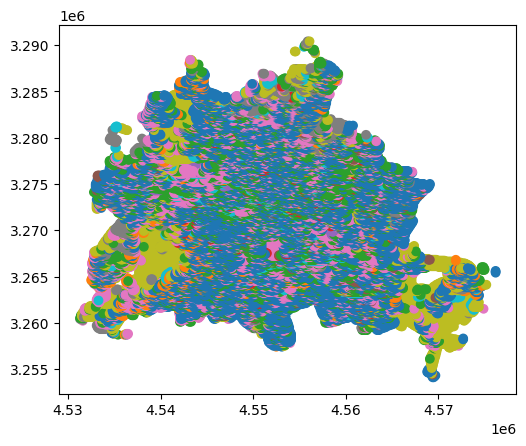

In [39]:
berlin_lu_centroids.plot(column='code_2018')

In [ ]:
squared_polygons_lu_bln = points_to_squares(berlin_lu_centroids,100)

## Feature join